<a href="https://colab.research.google.com/github/Vetyugov/ML/blob/master/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузите файл HR.csv в pandas dataframe.

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#Рассчитайте основные статистики для переменных: среднее(mean), медиана, мода(50%), мин/макс(min/max), среднее отклонение (std).

In [60]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [61]:
df.median()

<ipython-input-61-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

# Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [62]:
corr = df.corr()
corr

<ipython-input-62-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [63]:
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


## Вывод
Самая скоррелированная пара переменных: average_montly_hours и number_project
Наименнее скоррелированная пара переменных: left и satisfaction_level

#Рассчитайте, сколько сотрудников работает в каждом департаменте.

In [64]:
df.groupby(['department'])['salary'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

Покажите распределение сотрудников по зарплатам.

In [65]:
df['salary'] = df['salary'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   department             14999 non-null  object  
 9   salary                 14999 non-null  category
dtypes: category(1), float64(2), int64(6), object(1)
memory usage: 1.0+ MB


<Axes: xlabel='Team', ylabel='Count'>

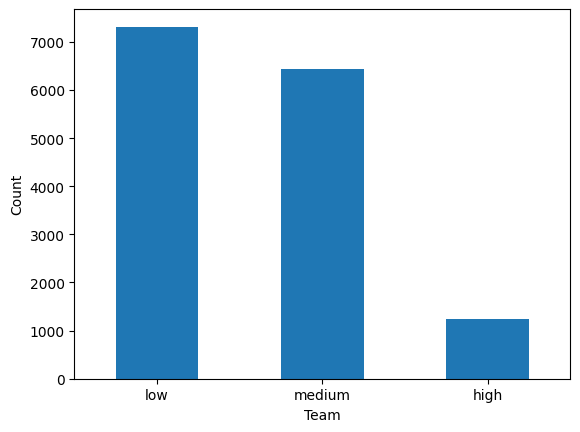

In [66]:
df['salary'].value_counts().plot(kind='bar', xlabel='Team', ylabel='Count', rot=0)

# Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности.

<Axes: xlabel='department'>

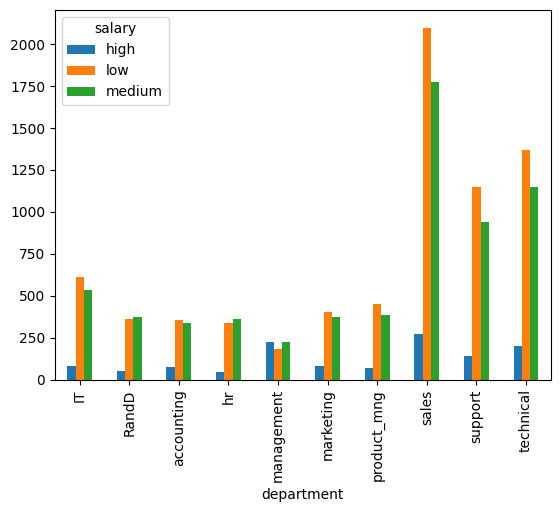

In [67]:
df.groupby(['department', 'salary']).size().unstack(fill_value=0).plot.bar()

#Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

<Axes: xlabel='salary'>

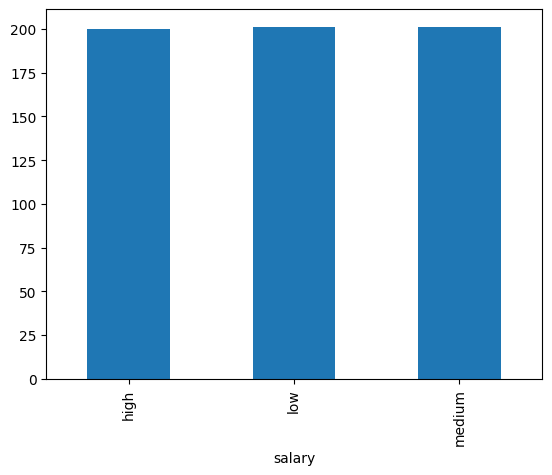

In [68]:
df.groupby(['salary'])['average_montly_hours'].mean().plot.bar()

In [69]:
import scipy.stats as stats

In [70]:
high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

# Проводим t-тест
t_statistic, p_value = stats.ttest_ind(high_salary, low_salary, equal_var=False)

# Вывод результатов
print(f'T-статистика: {t_statistic}')
print(f'p-значение: {p_value}')

# Принимаем решение на основе p-значения
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия в времени проведенном на работе")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимых различий в времени проведенном на работе нет")
print('\n')

T-статистика: -0.7624331665385475
p-значение: 0.4459045542257889
Не отвергаем нулевую гипотезу: статистически значимых различий в времени проведенном на работе нет




# Рассчитайте следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- доля сотрудников с повышением за последние 5 лет;
- средняя степень удовлетворённости;
- среднее количество проектов.

In [71]:
left = df[(df['left'] == 1)]
l1_p1_part = len(left[left['promotion_last_5years'] == 1])/len(left)
l1_p1_sat = left['satisfaction_level'].mean()
l1_p1_proj = left['number_project'].mean()

not_left = df[(df['left'] == 0)]
l0_p1_part =len(not_left[not_left['promotion_last_5years'] == 1])/len(not_left)
l0_p1_sat = not_left['satisfaction_level'].mean()
l0_p1_proj = not_left['number_project'].mean()

print(f'Уволившиеся:')
print(f'Доля получивших повышение:{l1_p1_part:.2%}')
print(f'средняя степень удовлетворённости:{l1_p1_sat:.3}')
print(f'среднее количество проектов:{l1_p1_proj:.3}')

print(f'Оставшиеся:')
print(f'Доля получивших повышение:{l0_p1_part:.2%}')
print(f'средняя степень удовлетворённости:{l0_p1_sat:.3}')
print(f'среднее количество проектов:{l0_p1_proj:.3}')

Уволившиеся:
Доля получивших повышение:0.53%
средняя степень удовлетворённости:0.44
среднее количество проектов:3.86
Оставшиеся:
Доля получивших повышение:2.63%
средняя степень удовлетворённости:0.667
среднее количество проектов:3.79


# Разделите данные на тестовую и обучающую выборки.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [91]:
# Разбиваем датасет на train и test
df_d = df.drop(['department','salary'],axis=1)
X = df_d.drop(['left'],axis=1)
y = df_d['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
len(y_test)

3750

# Постройте модель LDA, которая показывает, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).

In [95]:
# Create an LDA model
lda = LinearDiscriminantAnalysis()  # You can specify the number of components for dimensionality reduction

# Fit the model to the data
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Accuracy — это показатель, который описывает общую точность предсказания модели по всем классам. Это особенно полезно, когда каждый класс одинаково важен. Он рассчитывается как отношение количества правильных прогнозов к их общему количеству.

In [101]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [102]:
# Отчет о классификации
classification_rep = classification_report(y_test, y_pred)
print("Отчет о классификации:")
print(classification_rep)

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2853
           1       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



In [103]:
# смотрим разницу факта и прогноза Почему???
result = pd.DataFrame([y_test, y_pred]).T
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
10371,0.0,NaN
12541,1.0,NaN
2656,0.0,0.0
6759,0.0,NaN


# Оцените качество модели на тестовой выборке. Используйте метод accuracy.

In [104]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2%}")

Точность модели: 75.36%
